In [1]:
import gpxpy
from pandas import DataFrame

In [2]:
import os
from glob import glob

def load_run_data(gpx_path, filter=""):
    gpx_files = glob(os.path.join(gpx_path, filter + "*.gpx"))
    run_data = []
    for file_idx, gpx_file in enumerate(gpx_files): 
        gpx = gpxpy.parse(open(gpx_file, 'r'))
        # Loop through tracks
        for track_idx, track in enumerate(gpx.tracks):
            track_name = track.name
            track_time = track.get_time_bounds().start_time
            track_length = track.length_3d()
            track_duration = track.get_duration()
            track_speed = track.get_moving_data().max_speed
            
            for seg_idx, segment in enumerate(track.segments):
                segment_length = segment.length_3d()
                for point_idx, point in enumerate(segment.points):
                    run_data.append([file_idx, os.path.basename(gpx_file), track_idx, track_name, 
                                     track_time, track_length, track_duration, track_speed, 
                                     seg_idx, segment_length, point.time, point.latitude, 
                                     point.longitude, point.elevation, segment.get_speed(point_idx)])
    return run_data

In [3]:
data = load_run_data(gpx_path='data/gpx', filter="")
df = DataFrame(data, columns=['File_Index', 'File_Name', 'Index', 'Name',
                              'Time', 'Length', 'Duration', 'Max_Speed',
                              'Segment_Index', 'Segment_Length', 'Point_Time', 'Point_Latitude',
                              'Point_Longitude', 'Point_Elevation', 'Point_Speed'])

In [4]:
len(df)

144709

In [12]:
df.to_csv('data/gpx/all_tracks.csv')

##### clean up the DataFrame

In [5]:
cols = ['File_Index', 'Time', 'Length', 'Duration', 'Max_Speed']
tracks = df[cols].copy()
tracks['Length'] /= 1e3
tracks.drop_duplicates(inplace=True)

In [6]:
len(tracks)

198

### add a Track Year and Month columns based on track time

In [7]:
tracks['Year'] = tracks['Time'].apply(lambda x: x.year)
tracks['Month'] = tracks['Time'].apply(lambda x: x.month)
tracks_grouped = tracks.groupby(['Year','Month'])
tracks_grouped.describe().head()

Duration                                                     \
              count         mean          std     min      25%     50%   
Year Month                                                               
2017 6         16.0  1560.125000   806.318454   670.0  1121.25  1353.5   
     7         38.0  1801.842105  1061.757328   400.0  1211.75  1347.5   
     8          1.0  3066.000000          NaN  3066.0  3066.00  3066.0   
2018 6          1.0  1166.000000          NaN  1166.0  1166.00  1166.0   
     7         47.0  1995.042553  1582.820446   411.0  1025.50  1153.0   

                            File_Index                ...         Length  \
                75%     max      count        mean    ...            75%   
Year Month                                            ...                  
2017 6      1636.25  3695.0       16.0   33.250000    ...       9.753693   
     7      2040.25  4935.0       38.0   24.552632    ...      11.358244   
     8      3066.00  3066.0        1.0   20.000000    ...      17.402420   
2018 6      1166.00  1166.0        1.0  133.000000    ...       7.405830   
     7      2510.00  6529.0       47.0  131.936170    ...      15.855431   

                      Max_Speed                                          \
                  max     count      mean       std       min       25%   
Year Month                                                                
2017 6      18.451769      16.0  7.621341  0.547591  6.704418  7.229923   
     7      30.252068      38.0  7.677768  0.889915  5.913409  7.201854   
     8      17.402420       1.0  7.435989       NaN  7.435989  7.435989   
2018 6       7.405830       1.0  7.604542       NaN  7.604542  7.604542   
     7      38.513829      47.0  8.019556  1.363460  3.014150  7.598987   

                                           
                 50%       75%        max  
Year Month                                 
2017 6      7.714285  7.846886   8.784969  
     7      7.519941  8.052849  10.399508  
     8      7.435989  7.435989   7.435989  
2018 6      7.604542  7.604542   7.604542  
     7      8.166279  8.505242  11.498026  

[5 rows x 32 columns]

### distance pro month

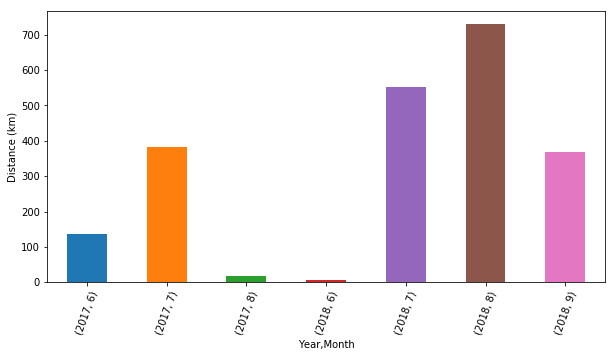

In [9]:
figsize=(10, 5)

tracks_grouped = tracks.groupby(['Year', 'Month'])
ax = tracks_grouped['Length'].sum().plot(kind='bar', figsize=figsize)
xlabels = [text.get_text() for text in  ax.get_xticklabels()]
ax.set_xticklabels(xlabels, rotation=70)
_ = ax.set_ylabel('Distance (km)')

In [17]:
tracks = df.copy()
tracks['Year'] = tracks['Time'].apply(lambda x: x.year)
tracks['Month'] = tracks['Time'].apply(lambda x: x.month)

#### converting m/s to km/h

In [18]:
tracks['Point_Speed'] = tracks['Point_Speed'] * 3.6

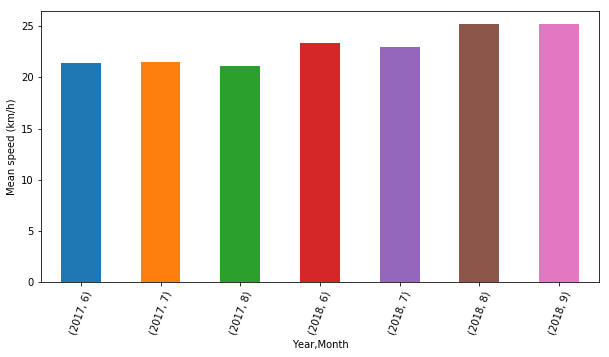

In [19]:

tracks_gr = tracks.groupby(by=['Year', 'Month'])
ax = tracks_gr['Point_Speed'].mean().plot(kind='bar', figsize=figsize)
xlabels = [text.get_text() for text in  ax.get_xticklabels()]
ax.set_xticklabels(xlabels, rotation=70)
_ = ax.set_ylabel('Mean speed (km/h)')

### separate 2017 and 2018

In [20]:
last_year = tracks.loc[tracks['Year'] == 2017]
this_year = tracks.loc[tracks['Year'] == 2018]

In [21]:
last_year[:4]

,File_Index,File_Name,Index,Name,Time,Length,Duration,Max_Speed,Segment_Index,Segment_Length,Point_Time,Point_Latitude,Point_Longitude,Point_Elevation,Point_Speed,Year,Month
0,0,2017._gada_10._jūl._12_03_37.gpx,0,2017. gada 10. jЕ«l. 12:03:37,2017-07-10 09:03:38,7423.773339,1278,7.862605,0,7423.773339,2017-07-10 09:03:38,56.650558,23.704233,57.0,12.491366,2017,7
1,0,2017._gada_10._jūl._12_03_37.gpx,0,2017. gada 10. jЕ«l. 12:03:37,2017-07-10 09:03:38,7423.773339,1278,7.862605,0,7423.773339,2017-07-10 09:03:42,56.650455,23.704176,50.0,16.896641,2017,7
2,0,2017._gada_10._jūl._12_03_37.gpx,0,2017. gada 10. jЕ«l. 12:03:37,2017-07-10 09:03:38,7423.773339,1278,7.862605,0,7423.773339,2017-07-10 09:03:46,56.650280,23.704077,38.0,19.666927,2017,7
3,0,2017._gada_10._jūl._12_03_37.gpx,0,2017. gada 10. jЕ«l. 12:03:37,2017-07-10 09:03:38,7423.773339,1278,7.862605,0,7423.773339,2017-07-10 09:03:51,56.650410,23.703743,38.0,22.840248,2017,7


In [42]:
import seaborn as sns

In [43]:
last_year.groupby(by=['File_Name'])